<a href="https://colab.research.google.com/github/MEHBUB-6001/LDA_Topic_Modelling_2021/blob/main/Class_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
import gensim
import numpy as np
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

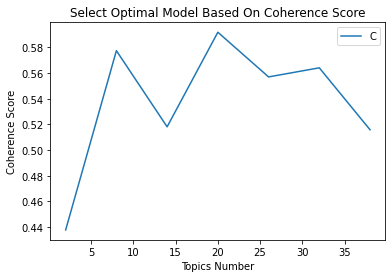

Topics Number = 2 ---- Coherence Value Is : 0.44
Topics Number = 8 ---- Coherence Value Is : 0.58
Topics Number = 14 ---- Coherence Value Is : 0.52
Topics Number = 20 ---- Coherence Value Is : 0.59
Topics Number = 26 ---- Coherence Value Is : 0.56
Topics Number = 32 ---- Coherence Value Is : 0.56
Topics Number = 38 ---- Coherence Value Is : 0.52


In [96]:
class LDA_Topic(BaseEstimator):
    def __init__(self,corpus=None,id2word=None,num_topics=10,random_state=100,num_iterations=100,chunksize=1000,update_every=1,passes=10,alpha='auto',per_word_topics=True):
        self.num_topics = num_topics
        self.num_iterations = num_iterations
        self.random_state = random_state
        self.passes=passes
        self.chunksize=chunksize
        self.update_every=update_every
        self.alpha=alpha
        self.per_word_topics=per_word_topics
        self.corpus=corpus
        self.id2word=id2word
        self.model_fit=gensim.models.ldamodel.LdaModel(corpus=self.corpus,id2word=self.id2word,num_topics=self.num_topics,random_state=self.random_state,update_every=self.update_every,
                          chunksize=self.chunksize,passes=self.passes,alpha=self.alpha,per_word_topics=self.per_word_topics)
    @staticmethod
    def create_dict_corpus(final_texts):
        texts=final_texts
        id2word = corpora.Dictionary(final_texts)
        corpus = [id2word.doc2bow(text) for text in texts]
        return (id2word,corpus)
    @staticmethod
    def clean_texts(texts_data):
      texts_data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in texts_data] # removes all emails
      texts_data = [re.sub(r'\s+', ' ', sent) for sent in texts_data]  # remove new line characters
      texts_data = [re.sub(r"\'", "", sent) for sent in texts_data]  # remove distracting single quotes
      texts_data = [re.sub(r'[^a-zA-Z]', ' ',sent) for sent in texts_data] # keep only characters  
      texts_data = [re.sub(r'\s+',' ',sent,flags=re.I) for sent in texts_data] #  Substituting multiple spaces with single space
      return (texts_data)
    @staticmethod
    def sentence_to_words(sentences):
      for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
    @staticmethod
    def make_bigrams(texts):
      bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
      bigram_mod = gensim.models.phrases.Phraser(bigram)
      return [bigram_mod[doc] for doc in texts]
    @staticmethod
    def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stopwords.words('english')] for doc in texts]
    @staticmethod
    def lemmatization(texts):
      lemmatizer=WordNetLemmatizer()
      Lemmatized_texts=[]
      for i in range(len(texts)):
         words=[lemmatizer.lemmatize(word) for word in texts[i]]
         #words=" ".join(words)
         Lemmatized_texts.append(words)
      return (Lemmatized_texts)
    @classmethod
    def compute_coherence_values(cls,corpus, id2word,Texts_lemmatized):
      start=2; limit=40; step=6;
      coherence_values = []
      cls.corpus=corpus
      cls.id2word=id2word
      cls.Texts_lemmatized=Texts_lemmatized
      model_list = []
      for num_topics in range(start, limit, step):
          model = gensim.models.ldamodel.LdaModel(corpus=cls.corpus, num_topics=num_topics,id2word=cls.id2word)
          model_list.append(model)
          coherencemodel = CoherenceModel(model,texts=cls.Texts_lemmatized,dictionary=cls.id2word, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
      return model_list, coherence_values
    @staticmethod
    def visualize_graphical_format(model_list,coherence_values):
      limit=40; start=2; step=6;
      x = range(start, limit, step)
      plt.plot(x, coherence_values)
      plt.xlabel("Topics Number")
      plt.ylabel("Coherence Score")
      plt.title('Select Optimal Model Based On Coherence Score')
      plt.legend(("Coherence_Values"), loc='best')
      plt.show()
      for m, cv in zip(x, coherence_values):
          print("Topics Number =", m,"----", "Coherence Value Is :", round(cv,2))
if __name__=="__main__":
    Texts_Data=fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes')) # importing fetch_20newsgrops.
    Texts_Data=Texts_Data.data #initialize data parts to a variable Texts_Data
    texts=Texts_Data
    Texts_Data=LDA_Topic.clean_texts(texts) #calling clean_texs method by using class object.
    Text_words = list(LDA_Topic.sentence_to_words(Texts_Data)) #calling sentence_to_words method by using class object.
    Text_words_nostopwords=LDA_Topic.remove_stopwords(Text_words) #calling remove_stopwords method by using class object.
    Texts_word_bigram=LDA_Topic.make_bigrams(Text_words_nostopwords) # calling make_bigrams method by using class object.
    Texts_lemmatized=LDA_Topic.lemmatization(Texts_word_bigram) #calling lemmatization method by using class object.
    id2word,corpus=LDA_Topic.create_dict_corpus(Texts_lemmatized) #calling create_dict_corpus method by using class object.
    # Doing Instantiation Of Class,which invoke __init__ method and initialize all parameters inside it.
    LDA=LDA_Topic(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,num_iterations=100,chunksize=1000, update_every=1, passes=10,alpha='auto',per_word_topics=True)
    model_list, coherence_values = LDA_Topic.compute_coherence_values(corpus,id2word,Texts_lemmatized) #calling compute_coherence_values method by using class object.
    LDA_Topic.visualize_graphical_format(model_list,coherence_values) #calling visualize_graphical_format method by using class object

In [99]:
LDA.model_fit.print_topics()

[(0,
  '0.015*"space" + 0.010*"entry" + 0.006*"launch" + 0.006*"mission" + 0.005*"file" + 0.005*"satellite" + 0.005*"program" + 0.005*"year" + 0.004*"shuttle" + 0.004*"mar"'),
 (1,
  '0.012*"book" + 0.004*"space" + 0.004*"printer" + 0.003*"john" + 0.003*"page" + 0.003*"wiring" + 0.003*"cover" + 0.003*"copy" + 0.003*"plane" + 0.003*"st"'),
 (2,
  '0.711*"ax" + 0.052*"max" + 0.002*"hz" + 0.002*"pl" + 0.002*"qax" + 0.002*"ei" + 0.001*"optional" + 0.001*"tm" + 0.001*"di_di" + 0.001*"qq"'),
 (3,
  '0.006*"year" + 0.006*"state" + 0.005*"president" + 0.005*"program" + 0.005*"mr_stephanopoulos" + 0.005*"israel" + 0.004*"national" + 0.004*"armenian" + 0.004*"april" + 0.004*"american"'),
 (4,
  '0.041*"drive" + 0.012*"jumper" + 0.011*"st" + 0.011*"scsi" + 0.008*"master" + 0.008*"slave" + 0.007*"ide" + 0.006*"mb" + 0.006*"single" + 0.005*"controller"'),
 (5,
  '0.010*"would" + 0.010*"get" + 0.009*"one" + 0.009*"like" + 0.008*"dont" + 0.006*"know" + 0.006*"time" + 0.006*"good" + 0.006*"year" + 0.0

In [97]:
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)#Selecting Optimal Model and printing topics

[(35,
  '0.019*"armenian" + 0.006*"turkey" + 0.006*"would" + 0.005*"turkish" + 0.005*"armenia" + 0.005*"one" + 0.005*"printer" + 0.005*"said" + 0.004*"card" + 0.004*"people"'),
 (25,
  '0.024*"entry" + 0.012*"file" + 0.010*"program" + 0.007*"build" + 0.007*"character" + 0.006*"info" + 0.006*"line" + 0.005*"use" + 0.005*"must" + 0.005*"section"'),
 (10,
  '0.009*"pem" + 0.007*"know" + 0.006*"like" + 0.005*"db_db" + 0.005*"one" + 0.004*"dont" + 0.004*"visual" + 0.004*"syndrome" + 0.004*"problem" + 0.004*"architecture"'),
 (14,
  '0.010*"people" + 0.008*"government" + 0.006*"would" + 0.005*"one" + 0.005*"year" + 0.005*"time" + 0.004*"many" + 0.003*"american" + 0.003*"make" + 0.003*"greek"'),
 (4,
  '0.036*"key" + 0.016*"v" + 0.011*"cal" + 0.011*"det" + 0.010*"space" + 0.010*"bos" + 0.009*"tor" + 0.009*"chi" + 0.008*"nasa" + 0.007*"nyi"'),
 (30,
  '0.007*"use" + 0.007*"tax" + 0.005*"like" + 0.005*"one" + 0.005*"program" + 0.004*"technology" + 0.004*"new" + 0.004*"power" + 0.004*"system" + 